**Импорт библиотек**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Загрузка датасета**

*Описание данных:*

*user_data*:

**client** – идентификатор пользователя

**premium** – является ли клиент премиальным

**age** – возраст


*logs*:

**client** – идентификатор пользователя

**success** – результат (успех – 1, нет – 0)

**platform** – платформа

**time** – время в формате Unix

Отображение данных, размеров таблиц, типов переменных и описательной статистики.

In [3]:
user_data = pd.read_csv('user_data.csv')
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
user_data.shape

(2954, 3)

In [6]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [5]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [8]:
logs = pd.read_csv('logs.csv')
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
logs.shape

(4500, 4)

In [10]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


*Найти какой клиент (или клиенты) совершил больше всего успешных операций?*

In [12]:
max_succsess_client = logs.query("success == True").groupby('client', as_index=False).success.count().sort_values(['success', 'client'], ascending=False).head(20)

In [13]:
max_succsess_client[max_succsess_client.success == max_succsess_client.success.max()].client

2626    92584
2345    82563
2231    78349
1759    61473
1758    61468
1487    52870
1020    36165
810     28719
332     12179
Name: client, dtype: int64

Наибольшее количество успешных операций у клиентов с id: 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584

*Найти с какой платформы было совершено наибольшее количество успешных операций?*

In [14]:
logs.query("success == True").groupby('platform', as_index=False).success.count().sort_values(['success', 'platform'], ascending=False).head(1)

,platform,success
1,phone,2019


Таким образом, наиболее популярной платформой среди успешных операций является - 'phone'.

*Найти какая платформа наиболее популярна среди премиумных клиентов?*

Объединение таблиц

In [15]:
logs_data = logs.merge(user_data, how='inner', on='client')
logs_data.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


Отбор по параметрам

In [16]:
logs_data.query("premium == True").groupby('platform', as_index=False).premium.count().sort_values(['premium', 'platform'], ascending=False)

,platform,premium
1,phone,246
0,computer,150
2,tablet,24


Таким образом, наиболее популярной платформой среди преимиального класса является - 'phone'.

*Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


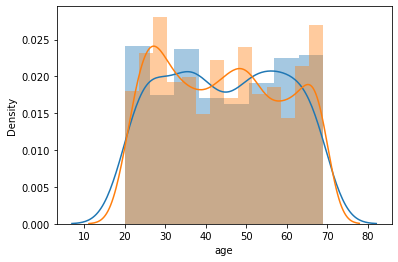

In [17]:
sns.distplot(logs_data.query('premium == True').age)
sns.distplot(logs_data.query('premium == False').age)

*Построение графика распределения числа успешных операций*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


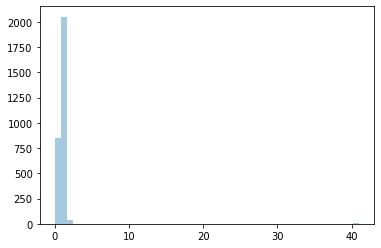

In [18]:
client_succsess = logs_data.groupby('client').agg({'success':'sum'})
sns.distplot(client_succsess, kde=False)

*Визуализация числа успешных операций, сделанных на платформе 'computer', в зависимости от возраста*

In [19]:
success_computer = logs_data.query("platform == 'computer' and success==True")
success_computer

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


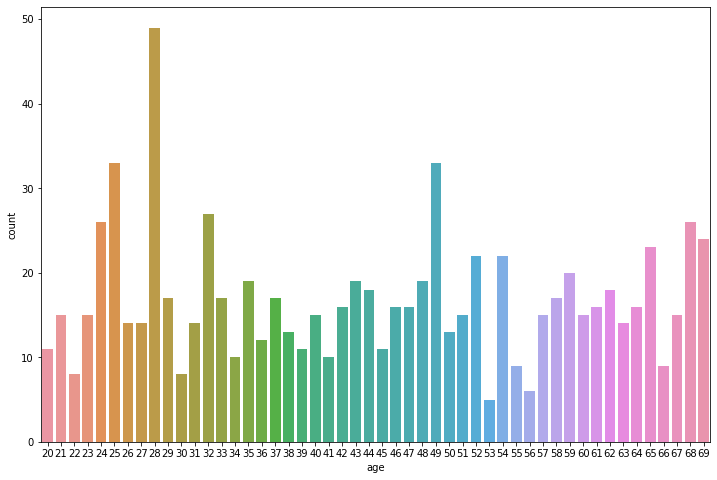

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(success_computer.age)

Наибольшее количество успешных действий совершено клиентами в возрасте 28 лет.